In [109]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [110]:
# Use create engine to import SQL DB 
engine = create_engine('sqlite:///mta_data.db')
engine.table_names()

['mta_data']

In [111]:
# Create pandas DF using data
df=pd.read_sql('SELECT * FROM mta_data;', engine)

In [112]:
# Stations we are interested in 
stations = (['8 ST-NYU', '68ST-HUNTER CO', '116 ST-COLUMBIA', 
             'ASTOR PL','DEKALB AV', 'FLATBUSH AV-B.C.', 
             'FRANKLIN AV', 'PRESIDENT ST', 'W 4 ST-WASH SQ', 
             'V.CORTLANDT PK'])

# Create mask to filter for those stations
stations_mask = df['STATION'].isin(stations)

# Filter stations
df = df[stations_mask]

In [113]:
# Check for column inconsistiencies
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [114]:
# Check datatypes, nulls etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13617 entries, 6045 to 605522
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   C/A       13617 non-null  object
 1   UNIT      13617 non-null  object
 2   SCP       13617 non-null  object
 3   STATION   13617 non-null  object
 4   LINENAME  13617 non-null  object
 5   DIVISION  13617 non-null  object
 6   DATE      13617 non-null  object
 7   TIME      13617 non-null  object
 8   DESC      13617 non-null  object
 9   ENTRIES   13617 non-null  int64 
 10  EXITS     13617 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 1.2+ MB


In [115]:
# Determine number of zero entries
df[df['ENTRIES']==0].ENTRIES.count()

42

In [116]:
# Find stations where zero values
df[df['ENTRIES']==0].STATION.unique()

array(['FRANKLIN AV'], dtype=object)

In [117]:
# Filter for FRANKLIN AV and 0 ENTRIES
df[(df['STATION']=='FRANKLIN AV') & (df['ENTRIES']==0)]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
66842,N114,R297,01-05-01,FRANKLIN AV,ACS,IND,09/04/2021,01:00:00,REGULAR,0,16
66843,N114,R297,01-05-01,FRANKLIN AV,ACS,IND,09/04/2021,05:00:00,REGULAR,0,16
66844,N114,R297,01-05-01,FRANKLIN AV,ACS,IND,09/04/2021,09:00:00,REGULAR,0,16
66845,N114,R297,01-05-01,FRANKLIN AV,ACS,IND,09/04/2021,13:00:00,REGULAR,0,16
66846,N114,R297,01-05-01,FRANKLIN AV,ACS,IND,09/04/2021,17:00:00,REGULAR,0,16
66847,N114,R297,01-05-01,FRANKLIN AV,ACS,IND,09/04/2021,21:00:00,REGULAR,0,16
66848,N114,R297,01-05-01,FRANKLIN AV,ACS,IND,09/05/2021,01:00:00,REGULAR,0,16
66849,N114,R297,01-05-01,FRANKLIN AV,ACS,IND,09/05/2021,05:00:00,REGULAR,0,16
66850,N114,R297,01-05-01,FRANKLIN AV,ACS,IND,09/05/2021,09:00:00,REGULAR,0,16
66851,N114,R297,01-05-01,FRANKLIN AV,ACS,IND,09/05/2021,13:00:00,REGULAR,0,16


In [118]:
# Looks to be a faulty turnstile, remmove those entries
df = df[df['ENTRIES'] != 0]

In [119]:
# Change date column to datetime64 type
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13575 entries, 6045 to 605522
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   C/A       13575 non-null  object        
 1   UNIT      13575 non-null  object        
 2   SCP       13575 non-null  object        
 3   STATION   13575 non-null  object        
 4   LINENAME  13575 non-null  object        
 5   DIVISION  13575 non-null  object        
 6   DATE      13575 non-null  datetime64[ns]
 7   TIME      13575 non-null  object        
 8   DESC      13575 non-null  object        
 9   ENTRIES   13575 non-null  int64         
 10  EXITS     13575 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 1.2+ MB


In [120]:
# Check for duplicates
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values('ENTRIES', ascending=False)
 ).head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A038,R085,00-00-00,8 ST-NYU,2018-09-01,00:00:00,1
9042,R219,R160,00-00-01,ASTOR PL,2018-09-03,21:00:00,1
9044,R219,R160,00-00-01,ASTOR PL,2018-09-04,05:00:00,1
9045,R219,R160,00-00-01,ASTOR PL,2018-09-04,09:00:00,1
9046,R219,R160,00-00-01,ASTOR PL,2018-09-04,13:00:00,1


In [121]:
df[df['DESC']=='RECOVR AUD'].STATION.unique()

array(['W 4 ST-WASH SQ', 'V.CORTLANDT PK'], dtype=object)

In [122]:
# Look for RECOVER AUD entries and check validity
df[(df['DESC']=='RECOVR AUD') &
  (df['STATION']=='V.CORTLANDT PK')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
555393,R197,R117,00-00-00,V.CORTLANDT PK,1,IRT,2018-09-05,16:00:00,RECOVR AUD,620979031,620974071
555434,R197,R117,00-00-01,V.CORTLANDT PK,1,IRT,2018-09-05,16:00:00,RECOVR AUD,3551547,1686716
555475,R197,R117,00-00-02,V.CORTLANDT PK,1,IRT,2018-09-05,16:00:00,RECOVR AUD,14371546,4485059
555516,R197,R117,00-03-00,V.CORTLANDT PK,1,IRT,2018-09-05,16:00:00,RECOVR AUD,1121306,172129


In [123]:
df.describe()

,ENTRIES,EXITS
count,1.357500e+04,1.357500e+04
mean,7.493854e+07,6.367623e+07
std,3.063383e+08,2.847817e+08
min,3.000000e+00,0.000000e+00
25%,8.739620e+05,3.541940e+05
50%,3.798687e+06,2.403533e+06
75%,8.917820e+06,7.541574e+06
max,2.000045e+09,2.062560e+09


In [124]:
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year

In [125]:
# Shift values from prior date and time to calculate actual counts
df['PRIOR_ENTRIES'] = (df.groupby
                       (["C/A", "UNIT", "SCP", "STATION", "YEAR"])
                       ['ENTRIES'].transform(lambda x: x.shift(1)))

In [126]:
# Take difference to obtain actual count
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PRIOR_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PRIOR_ENTRIES"])
        return 0
    return counter

df['ACTUAL_ENTRIES'] = (df.apply
                        (get_daily_counts, axis=1,
                        max_counter=1000000))

459328 6805542.0


In [128]:
# Create DF for each year
df_21 = df[df['YEAR']==2021]
df_19 = df[df['YEAR']==2019]
df_18 = df[df['YEAR']==2018]

In [129]:
# Total traffic for week in 2021 per station
df_21.groupby(['STATION']).ACTUAL_ENTRIES.sum().sort_values(ascending=False).reset_index()

,STATION,ACTUAL_ENTRIES
0,W 4 ST-WASH SQ,87322.0
1,DEKALB AV,70287.0
2,68ST-HUNTER CO,43397.0
3,FRANKLIN AV,41179.0
4,116 ST-COLUMBIA,34901.0
5,8 ST-NYU,32303.0
6,ASTOR PL,30490.0
7,V.CORTLANDT PK,21155.0
8,PRESIDENT ST,7863.0


In [130]:
# Total traffic for week in 2019 per station
df_19.groupby(['STATION']).ACTUAL_ENTRIES.sum().sort_values(ascending=False).reset_index()

,STATION,ACTUAL_ENTRIES
0,W 4 ST-WASH SQ,239663.0
1,DEKALB AV,171567.0
2,68ST-HUNTER CO,125553.0
3,FRANKLIN AV,121959.0
4,ASTOR PL,92283.0
5,8 ST-NYU,87275.0
6,116 ST-COLUMBIA,85343.0
7,V.CORTLANDT PK,40740.0
8,PRESIDENT ST,27832.0


In [131]:
# Total traffic for week in 2018 per station
df_18.groupby(['STATION']).ACTUAL_ENTRIES.sum().sort_values(ascending=False).reset_index()

,STATION,ACTUAL_ENTRIES
0,W 4 ST-WASH SQ,225271.0
1,DEKALB AV,191119.0
2,FRANKLIN AV,122828.0
3,68ST-HUNTER CO,119683.0
4,8 ST-NYU,102420.0
5,116 ST-COLUMBIA,84792.0
6,ASTOR PL,84298.0
7,V.CORTLANDT PK,47315.0
8,PRESIDENT ST,25410.0


In [132]:
# Total sum of all 3 weeks
station_total = df.groupby(['STATION']).ACTUAL_ENTRIES.sum().sort_values(ascending=False)

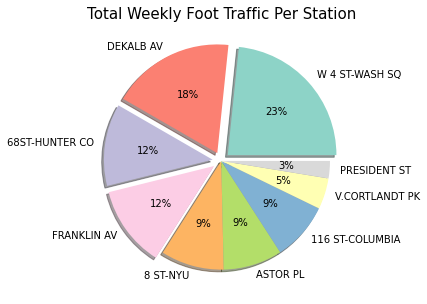

In [133]:
pie_plot = (station_total.plot.pie
            (figsize=(5, 5), 
             colors=['#8dd3c7', '#fb8072',
                     '#bebada', '#fccde5','#fdb462',
                     '#b3de69','#80b1d3', '#ffffb3', '#d9d9d9'], 
             ylabel='', shadow=True,autopct='%1.f%%',
             explode=(0.08, 0.08, 0.08, 0.08, 0, 0, 0, 0, 0)
            ))
pie_plot.set_title(
    'Total Weekly Foot Traffic Per Station',
    fontsize=15);

# Interlude
The total foot traffic over all three weeks from 2021, 2019, and 2018 consistently show the busiest stations to be the same 4 stations:
* W 4 ST-WASH SQ	
* DEKALB AV
* 68ST-HUNTER CO
* FRANKLIN AV

In [134]:
df['TIME'].unique()

array(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00',
       '20:00:00', '01:00:00', '05:00:00', '09:00:00', '13:00:00',
       '17:00:00', '21:00:00', '10:20:09', '10:21:13'], dtype=object)

In [135]:
# Helper function to group times
def fix_time(time_block):
    hour = int(str(time_block[:2]))
    
    if hour in (16, 17):
        return 16
    elif hour in (20, 21):
        return 20

In [136]:
# Apply helper function to group two time blocks of interest
df['FIXED_TIME'] = df['TIME'].apply(fix_time)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,YEAR,PRIOR_ENTRIES,ACTUAL_ENTRIES,FIXED_TIME
6045,A038,R085,00-00-00,8 ST-NYU,NRW,BMT,2021-09-04,00:00:00,REGULAR,4085773,3684742,2021,NaN,NaN,NaN
6046,A038,R085,00-00-00,8 ST-NYU,NRW,BMT,2021-09-04,04:00:00,REGULAR,4085802,3684761,2021,4085773.0,29.0,NaN
6047,A038,R085,00-00-00,8 ST-NYU,NRW,BMT,2021-09-04,08:00:00,REGULAR,4085812,3684790,2021,4085802.0,10.0,NaN
6048,A038,R085,00-00-00,8 ST-NYU,NRW,BMT,2021-09-04,12:00:00,REGULAR,4085832,3684881,2021,4085812.0,20.0,NaN
6049,A038,R085,00-00-00,8 ST-NYU,NRW,BMT,2021-09-04,16:00:00,REGULAR,4085899,3685042,2021,4085832.0,67.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605518,R635,R277,00-00-02,PRESIDENT ST,25,IRT,2018-09-07,04:00:00,REGULAR,6436204,5139389,2018,6436197.0,7.0,NaN
605519,R635,R277,00-00-02,PRESIDENT ST,25,IRT,2018-09-07,08:00:00,REGULAR,6436622,5139524,2018,6436204.0,418.0,NaN
605520,R635,R277,00-00-02,PRESIDENT ST,25,IRT,2018-09-07,12:00:00,REGULAR,6437277,5139707,2018,6436622.0,655.0,NaN
605521,R635,R277,00-00-02,PRESIDENT ST,25,IRT,2018-09-07,16:00:00,REGULAR,6437730,5140004,2018,6437277.0,453.0,16.0


In [138]:
# Make copy of df
aft_eve = df.copy()

In [142]:
# Drops all times not interested in
aft_eve = aft_eve.dropna()

In [151]:
# Groupby station to make pie chart
aft_eve_pie = aft_eve.groupby(['STATION']).ACTUAL_ENTRIES.sum().sort_values(ascending=False)

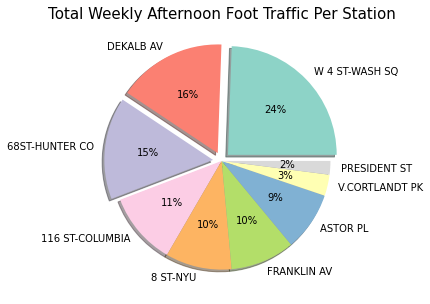

In [153]:
# Pie chart of total weekly afternoon foot traffic per station
pie_plot = (aft_eve_pie.plot.pie
            (figsize=(5, 5), 
             colors=['#8dd3c7', '#fb8072',
                     '#bebada', '#fccde5','#fdb462',
                     '#b3de69','#80b1d3', '#ffffb3', '#d9d9d9'], 
             ylabel='', shadow=True,autopct='%1.f%%',
             explode=(0.08, 0.08, 0.08, 0, 0, 0, 0, 0, 0)
            ))
pie_plot.set_title(
    'Total Weekly Afternoon Foot Traffic Per Station',
    fontsize=15);

In [163]:
# Remove irrelevant columns
entries_df = (df.drop(
    ['C/A', 'UNIT', 'SCP', 'DESC', 'LINENAME', 
     'EXITS', 'DIVISION', 'ENTRIES', 'EXITS',
     'PRIOR_ENTRIES'], axis=1))

In [164]:
entries_df = entries_df.dropna()
entries_df

,STATION,DATE,TIME,YEAR,ACTUAL_ENTRIES,FIXED_TIME
6049,8 ST-NYU,2021-09-04,16:00:00,2021,67.0,16.0
6050,8 ST-NYU,2021-09-04,20:00:00,2021,110.0,20.0
6055,8 ST-NYU,2021-09-05,16:00:00,2021,73.0,16.0
6056,8 ST-NYU,2021-09-05,20:00:00,2021,94.0,20.0
6061,8 ST-NYU,2021-09-06,16:00:00,2021,86.0,16.0
...,...,...,...,...,...,...
605510,PRESIDENT ST,2018-09-05,20:00:00,2018,415.0,20.0
605515,PRESIDENT ST,2018-09-06,16:00:00,2018,521.0,16.0
605516,PRESIDENT ST,2018-09-06,20:00:00,2018,455.0,20.0
605521,PRESIDENT ST,2018-09-07,16:00:00,2018,453.0,16.0


In [165]:
# DF of top 3 stations
top3 = (entries_df[
    (entries_df['STATION']=='W 4 ST-WASH SQ') |
    (entries_df['STATION']=='DEKALB AV') |
    (entries_df['STATION']=='68ST-HUNTER CO')
])

In [168]:
# Get day of week
top3['DAY'] = top3['DATE'].dt.dayofweek

/var/folders/d4/4s9thvnx41xgd5z9q39vv23h0000gn/T/ipykernel_21285/1579835597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3['DAY'] = top3['DATE'].dt.dayofweek


In [176]:
# Create separate dataframes for each year
top3_21 = top3[top3['YEAR']==2021]
top3_19 = top3[top3['YEAR']==2019]
top3_18 = top3[top3['YEAR']==2018]

In [196]:
# Groupby day and station to find busiest days of the week
days_top3_21 = (top3_21.groupby(['DAY', 'STATION'])
                .ACTUAL_ENTRIES.sum().reset_index())
days_top3_19 = (top3_19.groupby(['DAY', 'STATION'])
                .ACTUAL_ENTRIES.sum().reset_index())
days_top3_18 = (top3_18.groupby(['DAY', 'STATION'])
                .ACTUAL_ENTRIES.sum().reset_index())

In [310]:
# Create pivot tables for each plot for creating stacked bar charts

pivot_21 = (days_top3_21.pivot(index='DAY', 
                             columns='STATION', 
                             values='ACTUAL_ENTRIES'))
pivot_21 = pivot_21[['W 4 ST-WASH SQ','DEKALB AV','68ST-HUNTER CO']].copy()


pivot_19 = (days_top3_19.pivot(index='DAY', 
                             columns='STATION', 
                             values='ACTUAL_ENTRIES'))
pivot_19 = pivot_19[['W 4 ST-WASH SQ','DEKALB AV','68ST-HUNTER CO']].copy()

pivot_18 = (days_top3_18.pivot(index='DAY', 
                             columns='STATION', 
                             values='ACTUAL_ENTRIES'))
pivot_18 = pivot_18[['W 4 ST-WASH SQ','DEKALB AV','68ST-HUNTER CO']].copy()

top3_gb = top3.groupby(['DAY', 'STATION']).ACTUAL_ENTRIES.sum().reset_index()
pivot_total = (top3_gb.pivot(index='DAY', 
                         columns='STATION', 
                         values='ACTUAL_ENTRIES'))
pivot_total = pivot_total[['W 4 ST-WASH SQ','DEKALB AV','68ST-HUNTER CO']].copy()

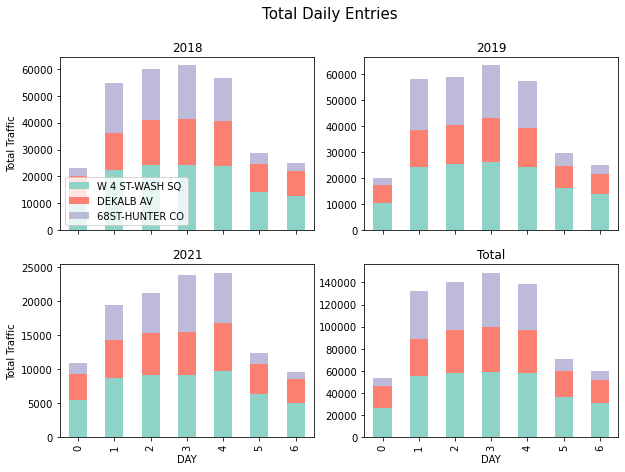

In [312]:
# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True)
# Add title 
fig.suptitle('Total Daily Entries', fontsize=15)

# Colors list to keep the same colors as pie chart
colors = {'DEKALB AV':'#fb8072',
          'W 4 ST-WASH SQ':'#8dd3c7',
          '68ST-HUNTER CO':'#bebada'}

# Change xtick labels to days of the week 
plt.xticks([0,1,2,3,4,5,6], 
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# 2018 plot
pivot_18.plot(ax = ax1, kind='bar', stacked=True, 
              figsize=(10,7), title='2018', color=colors, 
              ylabel='Total Traffic')
# 2019 plot
pivot_19.plot(ax = ax2, kind='bar', stacked=True, 
              figsize=(10,7), title='2019', color=colors, 
              legend=False)
# 2021 plot
pivot_21.plot(ax = ax3, kind='bar', stacked=True, 
              figsize=(10,7), title='2021', color=colors, 
              ylabel='Total Traffic', legend=False)
# combined total plot
pivot_total.plot(ax = ax4, kind='bar', stacked=True, 
                 figsize=(10,7), title='Total', color=colors, 
                 legend=False)

# Move legend to lower left on first subplot only
ax1.legend(loc='lower left');